In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt 
import statsmodels.api as sm
import seaborn as sn

In [2]:

model_attributes = ["population", "total_exchanges", "total_agents_created", "total_avg_price", "runtime", "water_avg_price", "sugar_avg_price", "tech_eff_capital",
                      #"num_basicherders", "num_arbitrageurherders", "num_basicbasics", "num_arbitrageurbasics", 
                               "bb_res_demand", "bh_res_demand", "ab_res_demand", "ah_res_demand"]

runs = 30

In [3]:
# avaliable data series ; should be same as model_attributes 
os.listdir("parquet")

['ab_res_demand',
 'ah_res_demand',
 'bb_res_demand',
 'bh_res_demand',
 'population',
 'runtime',
 'sugar_avg_price',
 'tech_eff_capital',
 'total_agents_created',
 'total_avg_price',
 'total_exchanges',
 'water_avg_price']

In [5]:
# create series of data included in regression model which includes all observations from all periods of all runs
cols = ["population", "tech_eff_capital"]
#attr_df = pd.DataFrame(columns=cols)
attr_dict = {}
for attr in cols: 
    attr_dict[attr] = {}
    for run in range(runs): 
        attr_dict[attr][run] = pd.read_parquet("parquet/" + attr + "/" + str(run) + ".parquet")[attr]
        

In [6]:
pd.__version__

'1.4.4'

In [40]:
# accessory funtion for quick regressions. can be changed as needed to suit model's needs 
def regress_attrs(X, Y):
    X = np.log(attr_df[X])
    Y = np.log(attr_df[Y])
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    return model
    


In [41]:
model = regress_attrs("population", "tech_eff_capital")
print(model.summary())

AttributeError: 'list' object has no attribute 'diff'

<AxesSubplot:>

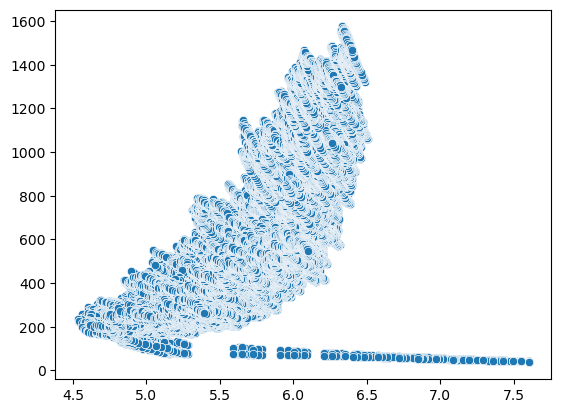

In [33]:
sn.scatterplot(x=np.log(attr_df["population"]), y=attr_df["tech_eff_capital"])

<AxesSubplot:ylabel='Count'>

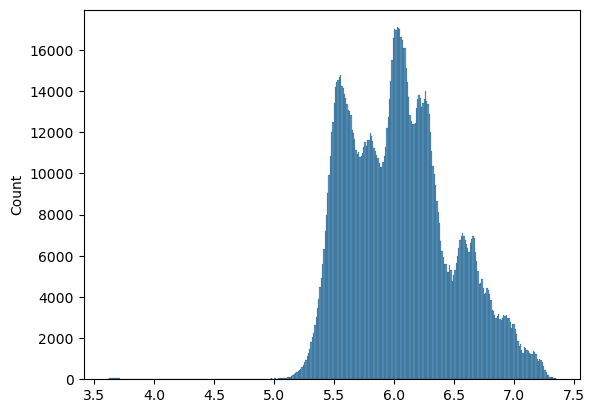

In [34]:
sn.histplot(np.log(attr_df["tech_eff_capital"]))

<AxesSubplot:ylabel='Count'>

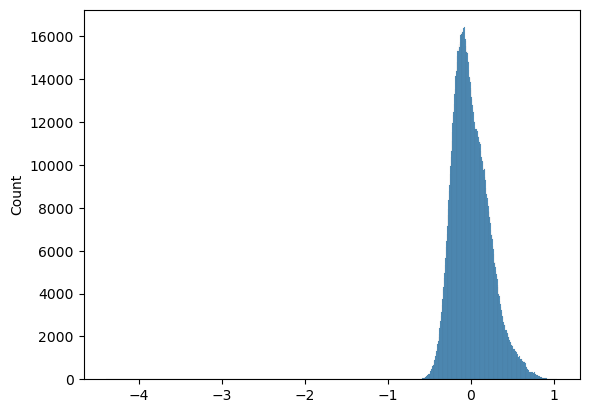

In [35]:
sn.histplot(model.resid, bins=1000)